In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns

matplotlib.font_manager._rebuild()
import numpy as np
from matplotlib.dates import DateFormatter

1. online
2. nothing
3. VMS
4. radio
5. full stack
7. full stack - limited capacity

### Parse
---

In [2]:
paths = ["E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_02.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_01.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_03.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_04.xlsx",
         "E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//results_05.xlsx"]
sheets = ["Event", "A01", "A02"]


prepare common index (timestamp)

In [3]:
idx = pd.date_range('00:00', '03:59:59', freq = '12s')
df = pd.DataFrame( index=idx)

parse data

In [4]:
for path in paths:
    for sheet in sheets:
        new_data = pd.read_excel(path, sheet_name=sheet, usecols=[1,3,4], index_col = 'time')
        new_data = new_data[new_data['name']=='iflw EQUIVALENT']['value']
        df[path.split("_")[-1].split(".")[0]+"_"+sheet] = new_data.values     

group data

In [5]:
experiment_names = ["online information", "no information","VMS", "radio news", "mixed"]
event = df[['01_Event','02_Event','03_Event','04_Event','05_Event']]
event.columns = experiment_names
a1 = df[['01_A01','02_A01','03_A01','04_A01','05_A01']]
a1.columns = experiment_names
a2 = df[['01_A02','02_A02','03_A02','04_A02','05_A02']]
a2.columns = experiment_names

convergenca data

In [173]:
iteracje = pd.read_excel("E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//iteracje.xlsx", 
                         sheet_name='conver')
iteracje['gap']=[v[:-1] if v.endswith(".") else v for v in iteracje.relgap.astype(str).values]

capacity data

In [353]:
cap = pd.DataFrame(index=idx)

for sheet in ['50','10','3','4','5','6']:
        new_data = pd.read_excel("E://Dropbox//SISTeMA//Inputs//toy//ICM_SIOUX//iteracje.xlsx", 
                                 sheet_name=sheet, usecols=[1,3,4], index_col = 'time')
        new_data = new_data[new_data['name']=='iflw EQUIVALENT']['value']
        cap[sheet] = new_data.values

# Plot
---

setup

In [326]:
titles =  [ 'Inflow at the event arc', 'Inflow at the eastern alternative arc', 'Inflow at the western alternative arc']
colors = ['black']*5
linestyles = ['-', '-', '--', ':', "--"]
dashes = [(1,0)]*5
dashes[2]=(10,10)
dashes[3]=(3,2)
markers = [None]*5
markers[0]="s"
lw=[0,0.5,0.5,2,2]
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.family"] = "Times New Roman"
#del matplotlib.font_manager.weight_dict['roman']

In [338]:
def p(df, title, ylim = [300,490], name=None):
    fig, axes = plt.subplots(1)
    axes.text(0.01, 0.13,'time of:', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.01, 0.03,'event', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.22, 0.08,'online', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.22, 0.03,'broadcast', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.39, 0.08,'VMS', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.39, 0.03,'broadcast', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.52, 0.08,'radio', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    axes.text(0.52, 0.03,'broadcast', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
    
    i = 0

    for col in [ "no information","online information","VMS", "radio news", "mixed"]:
        df[col].rolling(10).mean().plot(color=colors[i], 
                                           linestyle=linestyles[i],
                                           lw=lw[i],marker = markers[i], markevery = 6,dashes = dashes[i], markersize=4,
                                           ax = axes, legend=True)
        i+=1
    axes.axvline(x=event.index[300], color = 'black', linestyle='-', lw=2)
    axes.axvline(x=event.index[360], color = 'black', linestyle='-', lw=0.5)
    axes.axvline(x=event.index[408], color = 'black', linestyle='-', lw=0.5)
    axes.axvline(x=event.index[448], color = 'black', linestyle='-', lw=0.5)
    axes.set_xlim(event.index[298],event.index[590])
    axes.set_ylim(ylim[0],ylim[1])
    axes.legend(loc="lower left", bbox_to_anchor=(0.03,0.45), title = 'Scenario')
    #plt.title(title)
    if name:
        plt.savefig(name, dpi = 720)
    plt.show()

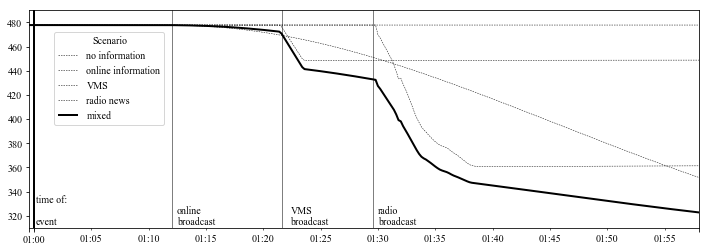

In [339]:
p(event, "Vehicle inflows into event arc in respective scenarios", ylim=[310,490], name = "event.png")

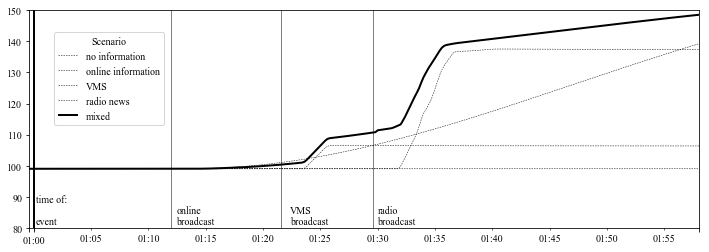

In [340]:
p(a1, "Vehicle inflows into eastern alternative arc in respective scenarios", ylim=[80,150], name='a1.png')

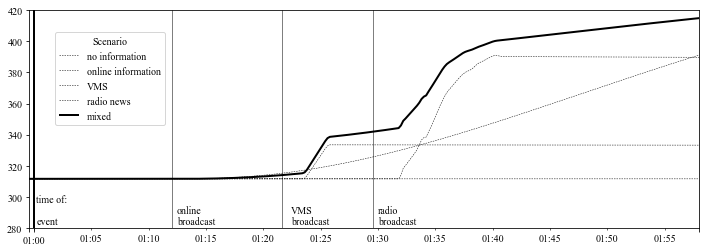

In [341]:
p(a2, "Vehicle inflows into western alternative arc in respective scenarios", ylim=[280,420], name='a2.png')

# Convergence

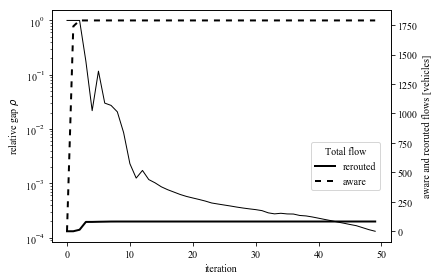

<Figure size 432x288 with 0 Axes>

In [368]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, ax1 = plt.subplots()


iteracje.gap.astype(float).plot(color='black', logy = True, lw=1, ax = ax1)



# Make the y-axis label, ticks and tick labels match the line color.


ax2 = ax1.twinx()
ax1.set_xlabel('iteration')
iteracje.rerouted.plot(ax=ax2, legend = True, color='black', lw=2)
iteracje.aware.plot(ax=ax2, legend = True, color='black', lw=2, ls="-", dashes=(3,3))

ax1.set_ylabel('relative gap ' + r'$\rho$')
ax2.tick_params('y')

fig.tight_layout()
#plt.title("Equilibrating rerouting flows and costs throughout the iterations.")
ax2.set_ylabel('aware and reoruted flows [vehicles]')
ax2.tick_params('y')
plt.legend(loc="lower left", bbox_to_anchor=(0.75,0.2), title = 'Total flow')
plt.show()
plt.savefig('convergence.png', dpi = 720)

# Capacity

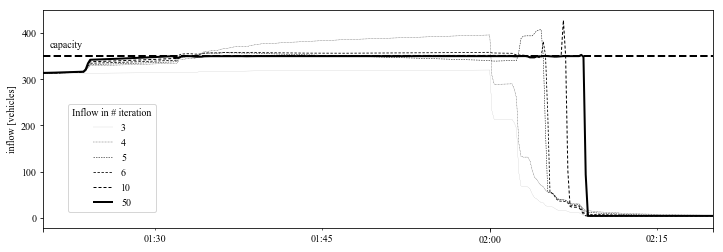

<Figure size 864x288 with 0 Axes>

In [373]:
plt.rcParams['figure.figsize'] = (12, 4)
colors = ['black']*6
linestyles = ['--', '--', '--', '--','--', "-"]
dashes = [(3,2)]*6
dashes[-1]=(1,0)
markers = [None]*6
#markers[0]="s"
lw=[0.1,0.3,0.5,0.8,1,2]
legends=[False]*6
legends[-1]=True
fig, axes = plt.subplots()
axes.set_ylabel('inflow [vehicles]')
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.family"] = "Times New Roman"
for i,col in enumerate(['3','4','5','6','10','50']):
    cap[col].rolling(2).min().plot(color=colors[i], 
                                           linestyle=linestyles[i],
                                           lw=lw[i],marker = markers[i], markevery = 6,dashes = dashes[i], markersize=4,
                                           ax = axes, legend=legends[i])
axes.axhline(y=350, color = 'black', linestyle='--', lw=2)
axes.set_xlim(event.index[400],event.index[700])
axes.text(0.01, 0.84,'capacity', horizontalalignment='left',verticalalignment='center',transform = axes.transAxes)
axes.legend(loc="lower left", bbox_to_anchor=(0.03,0.05), title = 'Inflow in # iteration')
plt.show()
plt.savefig('capacity.png', dpi = 720)